In [25]:
import numpy as np
import matplotlib.pyplot as plt


#  تعریف توابع انتقال و مشتقات آنها 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sig = sigmoid(x)
    return sig * (1 - sig)

def pureline(x):
    return x

def pureline_derivative(x):
    return np.ones_like(x)

#  مقادیر اولیه وزن‌ها و بایاس‌ها 
W1 = np.array([[-0.27], 
               [-0.41]])           # W1 => 2 x 1

b1 = np.array([[-0.48], 
               [-0.13]])           # b1 => 2 x 1

W2 = np.array([[0.09, -0.17]])     # W2 => 1 x 2
b2 = np.array([[0.48]])            # b2 => 1 x 1

#  تعریف تابع هدف 
def target_function(p):
    return 1 + np.sin((np.pi / 4) * p)

#  مقادیر ورودی و هدف 
inputs = np.array([[-2], [-1.6], [-1.2], [-0.8], [-0.4], [0], [0.4], 
                   [0.8], [1.2], [1.6], [2]])        # inputs => 11 x 1
targets = target_function(inputs)                    # targets => 11 x 1

#  هایپرپارامترها 
learning_rate = 0.1  # نرخ یادگیری
epochs = 1000        # تعداد تکرارها

#  آموزش شبکه عصبی 
losses = []  # لیست ذخیره مقدار خطا برای هر تکرار

for epoch in range(epochs):
    # Feedforward
    
    # np.dot(W1, inputs.T) => 2 x 11
    # Broadcasting b1 => [[-0.48, -0.48, -0.48, -0.48, -0.48, -0.48, -0.48, -0.48, -0.48,-0.48, -0.48],
    #                     [-0.13, -0.13, -0.13, -0.13, -0.13, -0.13, -0.13, -0.13, -0.13,-0.13, -0.13]]
    n1 = np.dot(W1, inputs.T) + b1   # n1 => 2 x 11
    a1 = sigmoid(n1)                 # a1 => 2 x 11        

    # np.dot(W1, inputs.T) => 1 x 11
    # b2 = np.array([[0.48]])
    # Broadcasting b2 => [[0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48,0.48, 0.48]]
    n2 = np.dot(W2, a1) + b2        # n2 => 1 x 11
    a2 = pureline(n2)               # a2 => 1 x 11
    #print('np.dot(W2, a1): ', np.dot(W2, a1).shape)
    
    #  محاسبه خطا 
    error = targets.T - a2          # error => 1 x 11
    #print('error: ', error.shape)
    total_loss = np.mean(error**2)  # Mean Square Error(MSE)
    losses.append(total_loss)

    #  Backpropagation
    
    # گرادیان‌های لایه 2
    # delta2 => 1 x 11
    # inputs.shape[0]=11
    delta2 = -2 * error  # گرادیان خطا نسبت به خروجی لایه 2
    dW2 = np.dot(delta2, a1.T) / inputs.shape[0]    # dW2 => 1 x 2
    db2 = np.mean(delta2, axis=1, keepdims=True)    # db2 => 1 x 1

    # گرادیان‌های لایه 1
    # sigmoid_derivative(n1) = a1(1-a1)
    delta1 = np.dot(W2.T, delta2) * sigmoid_derivative(n1)  # delta1 => 2 x 11
    dW1 = np.dot(delta1, inputs) / inputs.shape[0]     # dW1 => 2 x 1
    db1 = np.mean(delta1, axis=1, keepdims=True)       # db1 => 2 x 1

    #  به‌روزرسانی وزن‌ها و بایاس‌ها 
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

# پیش‌بینی خروجی‌ها
n1 = np.dot(W1, inputs.T) + b1
a1 = sigmoid(n1)
n2 = np.dot(W2, a1) + b2
predictions = pureline(n2).T
# OR predictions = pureline(np.dot(W2, sigmoid(np.dot(W1, inputs.T) + b1)) + b2).T

print("Loss for all epochs:")
losses

Loss for all epochs:


[0.8445390471297162,
 0.7135704845608616,
 0.6429022650257595,
 0.6037729634835297,
 0.5811705114523474,
 0.5672417371729808,
 0.5578717116221256,
 0.5508994111996413,
 0.5451853901022186,
 0.5401244719413584,
 0.5353910686422898,
 0.5308060976032799,
 0.5262674469627148,
 0.5217136477847565,
 0.517104900051613,
 0.5124131709107254,
 0.5076170389415212,
 0.5026990239084299,
 0.4976442201808844,
 0.49243961529342334,
 0.4870737692592304,
 0.4815366838314075,
 0.47581977107933543,
 0.46991587248859806,
 0.46381930163215407,
 0.45752589488296513,
 0.4510330606604965,
 0.44433982095257407,
 0.4374468407056264,
 0.4303564418483217,
 0.4230725995764347,
 0.4156009192654947,
 0.4079485930773181,
 0.4001243360170826,
 0.3921383018792236,
 0.3840019801772657,
 0.37572807576150286,
 0.36733037336430047,
 0.3588235897530023,
 0.35022321649721455,
 0.3415453565594453,
 0.3328065579919959,
 0.32402364797235833,
 0.3152135702446897,
 0.3063932287722426,
 0.29757934006496617,
 0.28878829625008806,
 0

## Error

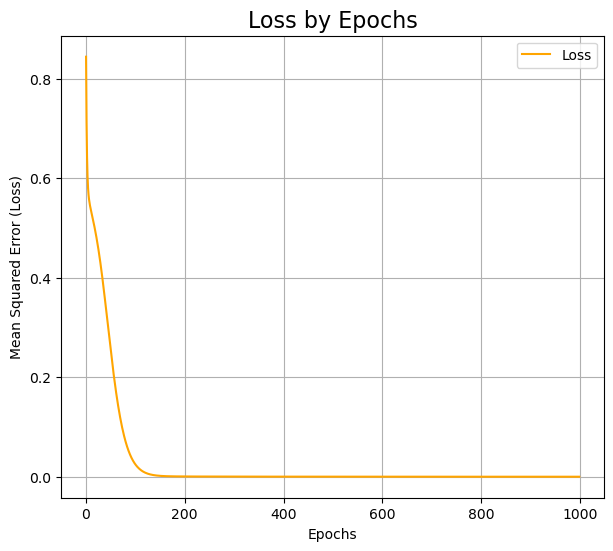

In [14]:
plt.figure(figsize=(7, 6))
plt.plot(range(epochs), losses, label="Loss", color='orange')
plt.title("Loss by Epochs", fontsize=16)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (Loss)")
plt.grid(True)
plt.legend()

## Predictions and Real outputs figures

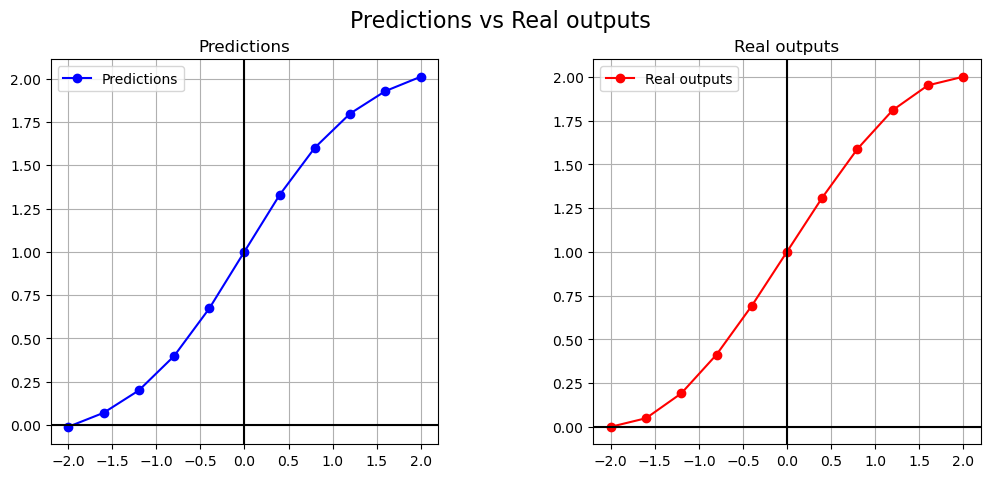

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

axes[0].plot(inputs, predictions, marker='o', label="Predictions", color="blue")
axes[0].set_title('Predictions')
axes[0].axhline(y=0, color='black')
axes[0].axvline(x=0, color='black')
axes[0].grid(True, which='both')
axes[0].legend()

axes[1].plot(inputs, targets, marker='o', label="Real outputs", color="red")
axes[1].set_title('Real outputs')
axes[1].axhline(y=0, color='black')
axes[1].axvline(x=0, color='black')
axes[1].grid(True, which='both')
axes[1].legend()

fig.suptitle('Predictions vs Real outputs', fontsize=16)
fig.subplots_adjust(wspace=0.4)

## Convergence figure

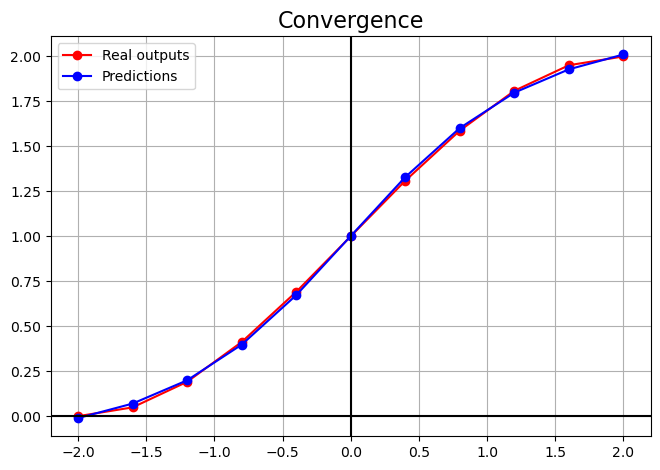

In [16]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(inputs, targets, marker='o', label="Real outputs", color="red")
ax.plot(inputs, predictions, marker='o', label="Predictions", color='blue')
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')
plt.title("Convergence", fontsize=16)
plt.grid(True)
plt.legend()